<a href="https://colab.research.google.com/github/Wish245/PyTorch_Tutorial/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

transform = transforms.ToTensor()

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 50555783.38it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1900108.14it/s]

Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13097882.25it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2882076.97it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [4]:
test_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
train_loader = DataLoader.DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader.DataLoader(test_data, batch_size=10, shuffle= False)

In [7]:
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [8]:
for i, (X_train, y_train) in enumerate(train_data):
   break

In [9]:
X_train.shape

torch.Size([1, 28, 28])

In [10]:
x = X_train.view(1,1,28,28)

In [11]:
x = F.relu(conv1(x))

In [12]:
x.shape

torch.Size([1, 6, 26, 26])

In [13]:
x = F.max_pool2d(x,2,2)

In [14]:
x.shape

torch.Size([1, 6, 13, 13])

In [15]:
x = F.relu(conv2(x))

In [16]:
x.shape

torch.Size([1, 16, 11, 11])

In [17]:
x = F.max_pool2d(x,2,2)

In [18]:
x.shape

torch.Size([1, 16, 5, 5])

In [19]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)
    x = x.view(-1,5*5*16)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x, dim=1)

In [20]:
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [22]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if b%100 == 0:
      print(f'epoch: {i}  batch: {b}  loss: {loss.item()}')
  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time
print(f'Trainig took : {total/60} minutes')

epoch: 0  batch: 100  loss: 1.2109216451644897
epoch: 0  batch: 200  loss: 0.36639341711997986
epoch: 0  batch: 300  loss: 0.14473110437393188
epoch: 0  batch: 400  loss: 0.18910661339759827
epoch: 0  batch: 500  loss: 0.09002391993999481
epoch: 0  batch: 600  loss: 0.27714279294013977
epoch: 0  batch: 700  loss: 0.5291472673416138
epoch: 0  batch: 800  loss: 0.42166203260421753
epoch: 0  batch: 900  loss: 0.1430385410785675
epoch: 0  batch: 1000  loss: 0.044817965477705
epoch: 0  batch: 1100  loss: 0.022007253021001816
epoch: 0  batch: 1200  loss: 0.05869954079389572
epoch: 0  batch: 1300  loss: 0.06924393028020859
epoch: 0  batch: 1400  loss: 0.0793910026550293
epoch: 0  batch: 1500  loss: 0.017932608723640442
epoch: 0  batch: 1600  loss: 0.026295553892850876
epoch: 0  batch: 1700  loss: 0.049900732934474945
epoch: 0  batch: 1800  loss: 0.14001299440860748
epoch: 0  batch: 1900  loss: 0.4330292344093323
epoch: 0  batch: 2000  loss: 0.06382660567760468
epoch: 0  batch: 2100  loss: 0.1

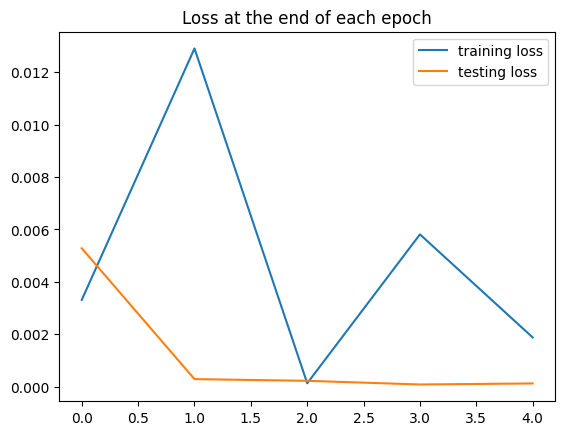

In [24]:
train_losses = [t.item() for t in train_losses]
test_losses = [t.item() for t in test_losses]
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='testing loss')
plt.title('Loss at the end of each epoch')
plt.legend()

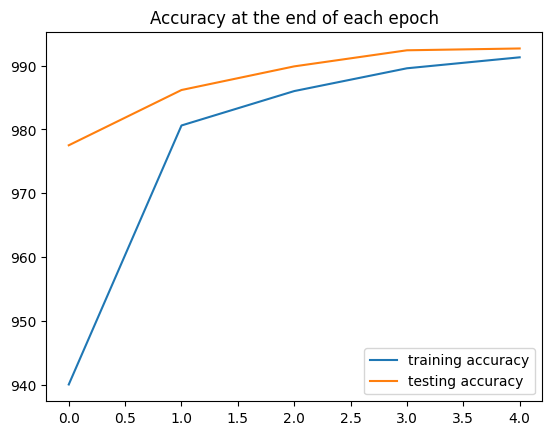

In [25]:
plt.plot([t/60 for t in train_correct], label='training accuracy')
plt.plot([t/60 for t in test_correct], label='testing accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [27]:
test_load_everything = torch.utils.data.DataLoader(test_data, batch_size = 10000, shuffle = False )

In [28]:
with torch.no_grad():
  correct = 0
  for b, (X_test, y_test) in enumerate(test_load_everything):
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()
  print(f'Test accuracy: {correct/len(test_data)}')

Test accuracy: 0.9926666617393494


In [30]:
correct.item()/len(test_data)

0.9926666666666667

In [33]:
test_data[2535][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

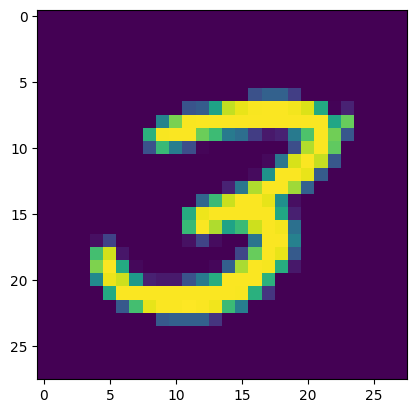

In [35]:
plt.imshow(test_data[2535][0].reshape(28,28))

In [36]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[2535][0].view(1,1,28,28))

In [37]:
new_prediction

tensor([[-2.5479e+01, -2.4431e+01, -1.5802e+01, -3.5763e-07, -2.9844e+01,
         -1.7955e+01, -2.6620e+01, -2.4213e+01, -1.5853e+01, -1.6483e+01]])

In [38]:
new_prediction.argmax()

tensor(3)